<a href="https://colab.research.google.com/github/krithikaceg/functional_intro_to_python/blob/master/weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ingest**

In [0]:
import pandas as pd
import seaborn as sns

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [0]:
df.shape

(1034, 6)

In [0]:
df.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

**Clean**

In [51]:
df.rename(index=str, columns={'Height(inches)':'height', 'Weight(pounds)': 'weight'}, inplace=True)
df.head()

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [52]:
df.Weight.fillna(value=df['Weight'].median(), inplace=True)
df.isnull().sum()

Name        0
Team        0
Position    0
Height      0
Weight      0
Age         0
dtype: int64

# **EDA**

In [39]:
df.describe()

,Height,Weight,Age
count,1034.000000,1034.000000,1034.000000
mean,73.697292,201.687621,28.736712
std,2.305818,20.981394,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


In [0]:
df=df1

In [61]:
dummies_team = pd.get_dummies(df['Team']).rename(columns=lambda x: 'Team_' + str(x))
dummies_position = pd.get_dummies(df['Position']).rename(columns=lambda x: 'Position_' + str(x))
df = pd.concat([df, dummies_team, dummies_position], axis=1)
#df.drop(['Team', 'Position'], inplace=True, axis=1)
df.head()

,Name,Team,Position,Height,Weight,Age,Team_ANA,Team_ARZ,Team_ATL,Team_BAL,...,Team_WAS,Position_Catcher,Position_Designated_Hitter,Position_First_Baseman,Position_Outfielder,Position_Relief_Pitcher,Position_Second_Baseman,Position_Shortstop,Position_Starting_Pitcher,Position_Third_Baseman
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,Paul_Bako,BAL,Catcher,74,215.0,34.69,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0, 0, 'Catcher'),
 Text(0, 0, 'First_Baseman'),
 Text(0, 0, 'Second_Baseman'),
 Text(0, 0, 'Shortstop'),
 Text(0, 0, 'Third_Baseman'),
 Text(0, 0, 'Outfielder'),
 Text(0, 0, 'Designated_Hitter'),
 Text(0, 0, 'Starting_Pitcher'),
 Text(0, 0, 'Relief_Pitcher')]

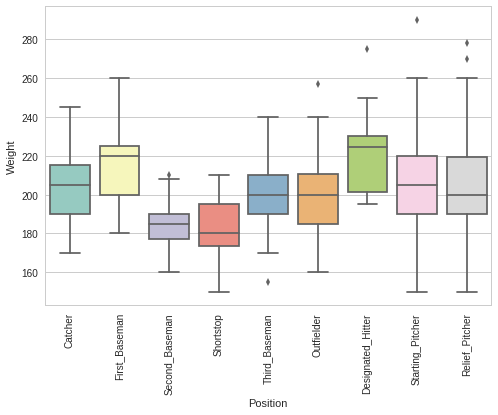

In [67]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Position", y="Weight", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

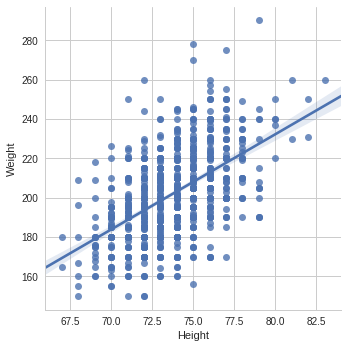

In [70]:
sns.set_style("whitegrid")
ax = sns.lmplot(x="Height", y="Weight", data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

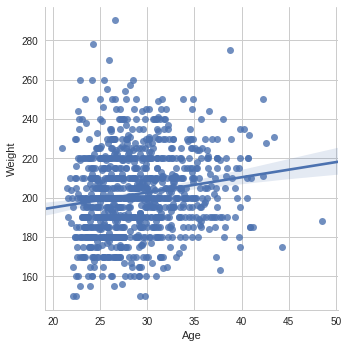

In [71]:
sns.set_style("whitegrid")
ax = sns.lmplot(x="Age", y="Weight", data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Model

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split



### Create Features


In [72]:
var = df['Weight'].values
var.shape

(1034,)

In [0]:
y = df['Weight'].values #Target
y = y.reshape(-1, 1)
X = pd.concat([df['Height'], dummies_position], axis=1) #Feature(s)
#X = X.reshape(-1,1)

In [81]:
X.shape

(1034, 10)

In [75]:
y.shape

(1034, 1)

### Split data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(827, 10) (827, 1)
(207, 10) (207, 1)


### Fit the model

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [0]:
lm.predict?

Returns Numpy Array

In [85]:
type(predictions)

numpy.ndarray

### Plot Predictions

Text(0, 0.5, 'Predicted Weight')

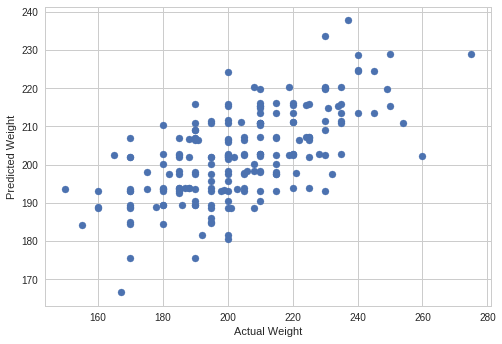

In [86]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

### Print Accuracy of Linear Regression Model

In [87]:
model.score(X_test, y_test)

0.38720938283701933

# Conclusion

From the box plots of position vs weight, it is evident that position is a factor that determines weight. So, upon including position in our model, our model's prediction accuracy has improved from 33% to 38%, which is 12.5% increase. 

Even then we were able to account for only 38% weight of the players. May be the weight is not explained only by height and position. There are many other factors that would accout for weight which are not in our database.